Mario Gibson Maia Pinto - 1924979 - MBA em Ciência de Dados - Programação com Python - Professor Enerson A. Oliveira

***

**Resumo do Trabalho**

Este trabalho realiza uma análise de dados sobre os tweets de autoria das principais vozes antagônicas da política brasileira, Lula e Jair Bolsonaro.

Foram utilizadas ferramentas essenciais da linguagem Python como laços de repetição, operações sobre Strings, operações condicionais, funções embutidas, operações aritméticas, estruturas como listas e dicionários, entre outros recursos.

Foram também utilizadas as bibliotecas Pandas; para construções de Dataframes, base para todo o trabalho; e a Matplotlib, para exibição de gráficos comparativos; ambas vistas em sala de aula.

Adicionalmente foram utilizadas bibliotecas como a NLTK - Natural Language Toolkit (1), para auxílio no tratamento de palavras dos textos dos tweets e a WordCloud (2), para exibição de nuvens de palavras.

Durante o trabalho foram apresentadas observações acerca dos resultados obtidos e ao final foram realizadas algumas considerações.

***

**Solução Técnica**

Este trabalho realiza a leitura dos dados dos arquivos Json contendo os tweets fornecidos, recuperando atributos considerados relevantes para as análises propostas. Estes dados são armazenados em dois Dataframes: "Dataframe de Tweets" e "Dataframe de Quantificadores por Período (mês e ano)". 

O "Dataframe de Tweets" foi utilizado para possibilitar respostas acerca das postagens realizadas como número total de postagens, palavras mais utilizadas, tweets com o maior número de interações (curtidas + retweets), número de vezes em que um citou o outro, etc.
 
O "Dataframe de Quantificadores por Período" foi utilizado para possibilitar a geração de gráficos comparativos entre os dois perfis: Total de Citações ao Oponente; Total de Tweets; Total de Interações e Total de Engajamento (interações/total de tweets). Para realizar essas comparações foi necessário a realização de um "inner join" entre os dois Dataframes gerados para que pudesse ser considerado o período de atividade comum entre os dois perfis. 

***

**Índice**

1. Construção de objetos e funções
2. Montagem de Dataframes
3. Análise da Dados
- 3.1 Dados Gerais
    - 3.1.1 Total de tweets
    - 3.1.2 Primeiros Tweets
    - 3.1.3 Tweets com o maior número de interações)
    - 3.1.4 Palavras mais utilizadas
    - 3.1.5 Palavras mais utilizadas nas 100 maiores interações)    
- 3.2 Guerra Digital
    - 3.2.1 Primeiro tweet em que um citou o outro
    - 3.2.2 Número de Tweets em que um citou o outro
    - 3.2.3 Palavras mais utilizadas em que um citou o outro
    - 3.2.4 Gráfico comparativo de citações   
- 3.3 A Força das Redes
    - 3.3.1 Gráfico Comparativo - Total de Tweets
    - 3.3.2 Gráfico Comparativo - Interações
    - 3.3.3 Gráfico Comparativo - Engajamento
4. Considerações Finais

<a id='section_1'></a>
<hr> 

# CONSTRUÇÃO DE OBJETOS E FUNÇÕES

Objetos e Funções criados para a realização da leitura dos Tweets a partir do arquivo Json e para a montagem dos Dataframes.

In [3]:
# Importando Wordcloud
from wordcloud import WordCloud

In [4]:
# Importando Matplotlib
import matplotlib.pyplot as plt

In [5]:
# Importando Pandas
import pandas as pd

In [6]:
# Importando NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [7]:
# Importando demais bibliotecas
import datetime
import json
import re

In [8]:
# Objeto Tweet - Utilizado na leitura de Tweets e na montagem dos Dataframes

class Tweet:   
    
    def __init__(self, ident, date, text, retweet_count, favorite_count, words):
        
        self.ident = ident
        self.date = datetime.datetime.strptime(date, "%a %b %d %H:%M:%S %z %Y")
        self.text = text
        self.retweet_count = retweet_count
        self.favorite_count = favorite_count
        self.total_actions_count = retweet_count + favorite_count
        self.words = words    
        year = str(self.date.year)
        month = str(self.date.month).zfill(2)
        self.period = year + "_" + month


In [9]:
# Função para ler o arquivo Json e recuperar todos os Tweets e atributos relevantes para a análise

def reading_tweets(file):
    
    tweets = []
    
    with open(file, 'r') as f:
        
        tweets_json = json.load(f)
        
        # Percorrendo todos os tweets
        for item in tweets_json:        
            ident = item['id']
            date = item['created_at']
            text = item['full_text']
            retweet_count = item['retweet_count']
            favorite_count = item['favorite_count']
            
            # Separando o texto em palavras
            sentences = sent_tokenize(text)
            words = word_tokenize(text.lower())
            
            # Removendo stopwords
            new_words = remove_stopwords(words)
            
            # Limpando pontuações, imagens, símbolos
            new_words = clean_words(new_words)
            
            # Removendo urls
            new_words = clean_urls(new_words)
            
            tweet = Tweet(ident, date, text, retweet_count, favorite_count, new_words) 
            tweets.append(tweet)
            
            #break
    
    # Ordenando a lista de Tweets pelo identificador
    tweets.sort(key=lambda a: a.ident)
            
    return tweets

In [10]:
# Função auxiliar para remover caracteres indesejados nos textos dos Tweets

chars=["\"","!","@","#","$","%","&","*","(",")","-","_","`","'","{","[","]","}","^","~",",",".",";",":","\","," "]

def clean_words(words):
   
    new_words = []
    
    for word in words:
         # Verificando se o caracter pertence ao ASCII
        if(all(ord(char) < 128 for char in word)):
            for letter in word:
                if letter in chars:
                    word=word.replace(letter,"")
        new_words.append(word)            
    return new_words

In [11]:
# Função auxiliar para remover urls nos textos dos Tweets

def clean_urls(words):
    
    new_words = []
    
    for word in words:      
        
        if (bool(re.match('http', word)) == False) and (bool(re.match('//tco', word)) == False) and (bool(re.match('//t.co', word)) == False):
            new_words.append(word)

    return new_words

In [12]:
# Função para remover "stopwords" dos textos dos Tweets

def remove_stopwords(words):
    
    stopwords = nltk.corpus.stopwords.words('portuguese') + list(punctuation)    
    new_words=[]
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [13]:
# Função para montar um Dataframe de Tweets a partir do arquivo Json

def building_tweets_dataframe(tweets):
    
    # Listas utilizadas para montagem do dataframe
    ident_list = []
    date_list = []
    text_list = []
    retweet_count_list = []
    favorite_count_list = []
    total_actions_count_list = []
    period_list = []
    words_list = []
    
    for tweet in tweets:        
        ident_list.append(tweet.ident)
        date_list.append(tweet.date)
        text_list.append(tweet.text)
        retweet_count_list.append(tweet.retweet_count)
        favorite_count_list.append(tweet.favorite_count)
        total_actions_count_list.append(tweet.total_actions_count)
        period_list.append(tweet.period)
        words_list.append(tweet.words)
        
    # Dicionário utilizado como parâmetro para a montagem
    data={'ident': pd.Series(ident_list), 
          'date': pd.Series(date_list),
          'text': pd.Series(text_list),
          'retweet_count': pd.Series(retweet_count_list),
          'favorite_count': pd.Series(favorite_count_list),
          'total_actions_count' :pd.Series(total_actions_count_list),
          'period': pd.Series(period_list),
          'words':pd.Series(words_list)}

    # Criando Dataframe
    dataframe = pd.DataFrame(data)
    
    dataframe.to_csv('output.csv',sep=';',encoding='utf-8',index=False) # Escrevendo um CSV
    
    return dataframe

In [14]:
# Função para montar um Dataframe de Quantificadores por Período (mês e ano) a partir do Dataframe de Tweets

def building_periods_dataframe(dataframe, opponent_word):

    period_set = set()        
    for item in dataframe.period:
        period_set.add(item)
    
    # Listas utilizadas para montagem do dataframe
    period_list = list(period_set)
    period_list.sort()
    retweet_count_list = []
    favorite_count_list = []
    total_actions_count_list = []
    total_tweets_list = []
    engagement_count_list = []
    opponent_word_count_list = []
        
    # Populando quantificadores para cada mês e ano
    for index in period_list:
        # Somando total de retweets do período
        retweet_count = sum(dataframe['retweet_count'].loc[dataframe['period'] == index])
        retweet_count_list.append(retweet_count)
        # Somando total de curtidas do período
        favorite_count = sum(dataframe['favorite_count'].loc[dataframe['period'] == index])
        favorite_count_list.append(favorite_count)
        # Somando total de interações do período
        total_actions_count = retweet_count + favorite_count
        total_actions_count_list.append(total_actions_count)  
        # Somando total de tweets do período
        total_tweets = len(dataframe.loc[dataframe['period'] == index])
        total_tweets_list.append(total_tweets)
        # Calculando o percentual de engajamento dos seguidores (percentual de postagens com interações)
        engagement_count_list.append(total_actions_count/total_tweets)
        # Calculando o número de citações ao oponente
        num = count_tweets_with_a_word(dataframe.loc[dataframe['period'] == index], opponent_word)
        opponent_word_count_list.append(num)
    
    # Dicionário utilizado como parâmetro para a montagem
    data={'period': pd.Series(period_list), 
          'retweet_count': pd.Series(retweet_count_list),
          'favorite_count': pd.Series(favorite_count_list),
          'total_tweets': pd.Series(total_tweets_list),
          'total_actions_count': pd.Series(total_actions_count_list),
          'engagement_count': pd.Series(engagement_count_list),
          'opponent_word_count' : pd.Series(opponent_word_count_list)}
    
    # Criando Dataframe
    dataframe = pd.DataFrame(data)
    
    return dataframe  

In [15]:
# Função utilizada para montar uma nuvem de palavras a partir de uma lista de palavras

def generate_text_cloud(words_list):
    
    words=""
    
    # Criando string a partir da lista de palavras
    for word in words_list:
        words = words + word

    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(words)

    # Display the generated image:
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [16]:
# Função utilizada para montar uma nuvem de palavras a partir dos tweets com X maiores interações

def generate_text_cloud_top_actions_tweets(dataframe, number):
    
    top_actions = dataframe.total_actions_count.nlargest(number)

    top_words = ""

    for indice in top_actions.index:
        words = dataframe['words'][indice]
        for word in words:
            top_words = top_words + " " + word

    generate_text_cloud(top_words)    

In [17]:
# Função auxiliar para recuperar as palavras utilizadas a partir do Dataframe de Tweets

def build_cloud_words(dataframe):
        
    all_cloud_words = ""
    
    for indice in dataframe.index:
        column_words = dataframe['words'][indice]   
        for word in column_words:
            all_cloud_words = all_cloud_words + " " + word
    
    return all_cloud_words

In [18]:
# Função para contar quantas vezes uma palavra foi utilizada nos textos dos Tweets

def count_tweets_with_a_word(dataframe, word):
    contador = 0

    for indice in dataframe.index:
        words = dataframe['words'][indice]
        if (word in words):
            contador = contador + 1

    return contador  

In [19]:
# Função para retornar o primeiro Tweet

def get_first_tweet(dataframe):
    return dataframe.loc[0]

In [20]:
# Função para retornar o primeiro Tweet com o palavra buscada
# Ex: Primeiro Tweet em que Lula citou bolsonaro

def get_first_tweet_with_a_word(dataframe, word):

    for indice in dataframe.index:
        words = dataframe['words'][indice]
        if (word in words):
            return dataframe.loc[indice]       

In [21]:
# Função para retornar o Tweet com maior número de interações (curtidas + retweets)

def get_top_action_tweet(dataframe):
    indice = dataframe.total_actions_count.idxmax()
    return dataframe.loc[indice]

In [22]:
# Método auxiliar para exibir determinado Tweet 

def show_tweet(dataframe):
    
    date = dataframe['date']
    date_str = date.strftime('%d/%m/%Y')
    print(date_str)
    print(dataframe['text'])

In [23]:
# Função para gerar uma nuvens de palavras com as palavras que foram utilizadas juntamente à palavra buscada 
# Ex: Quais palavras foram mais utilizadas quando Bolsonaro citou "Lula"

def genenerate_text_cloud_words_tweets(dataframe, search_word):
    
    words_result = ""

    for indice in dataframe.index:
        words = dataframe['words'][indice]
        if (search_word in words):
            for word in words:
                words_result = words_result + " " + word
    
    generate_text_cloud(words_result)      

In [24]:
# Função para a geração de gráfico comparativo com dados de interações entre dois Dataframes

def generate_graphic_with_actions(dataframe1, dataframe2, label1, label2):
    
    # Executando merge nos dataframes de períodos para recuperar período de tweets em comum
    x = pd.merge(dataframe1, dataframe2, on='period', how='inner').period

    # Recuperando total interações em tweets de Bolsonaro no período em comum
    y1 = pd.merge(x, dataframe1, on='period', how='inner').total_actions_count

    # Recuperando total interações em tweets de Lula no período em comum
    y2 = pd.merge(x, dataframe2, on='period', how='inner').total_actions_count
    
    color1 = 'green'
    color2 = 'red'
    xLabel = 'Período (Ano_Mês)'
    yLabel = 'Interações'
    title = 'Interações (curtidas + retweets)'
      
    plt.rcParams['figure.figsize'] = (18,9)
    plt.plot(x,y1,color=color1, linestyle='solid', linewidth=2,label=label1)
    plt.plot(x,y2,color=color2, linestyle='solid', linewidth=2,label=label2)

    plt.xticks(rotation=90)
    plt.legend(fontsize=15)
    plt.xlabel(xLabel,fontsize=15)
    plt.ylabel(yLabel,fontsize=15)
    plt.title(title)
    plt.show()

In [25]:
# Função para a geração de gráfico comparativo com número de postagens entre dois Dataframes

def generate_graphic_with_total_tweets(dataframe1, dataframe2, label1, label2):
    
    # Executando merge nos dataframes de períodos para recuperar período de tweets em comum
    x = pd.merge(dataframe1, dataframe2, on='period', how='inner').period

    # Recuperando total de tweets de Bolsonaro no período em comum
    y1 = pd.merge(x, dataframe1, on='period', how='inner').total_tweets

    # Recuperando total de tweets de Lula no período em comum
    y2 = pd.merge(x, dataframe2, on='period', how='inner').total_tweets
    
    color1 = 'green'
    color2 = 'red'
    xLabel = 'Período (Ano_Mês)'
    yLabel = 'Interações'
    title = 'Total de Tweets'
      
    plt.rcParams['figure.figsize'] = (18,9)
    plt.plot(x,y1,color=color1, linestyle='solid', linewidth=2,label=label1)
    plt.plot(x,y2,color=color2, linestyle='solid', linewidth=2,label=label2)

    plt.xticks(rotation=90)
    plt.legend(fontsize=15)
    plt.xlabel(xLabel,fontsize=15)
    plt.ylabel(yLabel,fontsize=15)
    plt.title(title)
    plt.show()

In [26]:
# Função para a geração de gráfico comparativo de engajamento (percentual de postagens em que houveram interações)

def generate_graphic_with_engagement_count(dataframe1, dataframe2, label1, label2):
    
    # Executando merge nos dataframes de períodos para recuperar período de tweets em comum
    x = pd.merge(dataframe1, dataframe2, on='period', how='inner').period

    # Recuperando percentual de engajamentos em tweets do Bolsonaro no período em comum
    y1 = pd.merge(x, dataframe1, on='period', how='inner').engagement_count

    # Recuperando percentual de engajamentos em tweets do Lula no período em comum
    y2 = pd.merge(x, dataframe2, on='period', how='inner').engagement_count
    
    color1 = 'green'
    color2 = 'red'
    xLabel = 'Período (Ano_Mês)'
    yLabel = 'Engajamento'
    title = 'Percentual de Engajamento'
      
    plt.rcParams['figure.figsize'] = (18,9)
    plt.plot(x,y1,color=color1, linestyle='solid', linewidth=2,label=label1)
    plt.plot(x,y2,color=color2, linestyle='solid', linewidth=2,label=label2)

    plt.xticks(rotation=90)
    plt.legend(fontsize=15)
    plt.xlabel(xLabel,fontsize=15)
    plt.ylabel(yLabel,fontsize=15)
    plt.title(title)
    plt.show()

In [27]:
# Função para a geração de gráfico comparativo de citações de oponentes

def generate_graphic_with_opponent_word_count(dataframe1, dataframe2, label1, label2):
    
    # Executando merge nos dataframes de períodos para recuperar período de tweets em comum
    x = pd.merge(dataframe1, dataframe2, on='period', how='inner').period

    # Recuperando percentual de engajamentos em tweets do Bolsonaro no período em comum
    y1 = pd.merge(x, dataframe1, on='period', how='inner').opponent_word_count

    # Recuperando percentual de engajamentos em tweets do Lula no período em comum
    y2 = pd.merge(x, dataframe2, on='period', how='inner').opponent_word_count
    
    color1 = 'green'
    color2 = 'red'
    xLabel = 'Período (Ano_Mês)'
    yLabel = 'Número de Citações'
    title = 'Citações ao oponente'
      
    plt.rcParams['figure.figsize'] = (18,9)
    
    plt.bar(x, y1, color=color1, label=label1)
    plt.bar(x, y2, color=color2, label=label2)

    plt.xticks(rotation=90)
    plt.legend(fontsize=15)
    plt.xlabel(xLabel,fontsize=15)
    plt.ylabel(yLabel,fontsize=15)
    plt.title(title)
    plt.show()

In [28]:
# Função para montar gráfico de barras comparativos

def generate_graphic_bar(labels, values, colors):

    c = plt.barh(labels, values, color=colors)   
    plt.show()

<a id='section_2'></a>
<hr>

# MONTAGEM DE DATAFRAMES
Realizando chamada de funções para a leitura dos Tweets e posterior montagem dos Dataframes

In [29]:
# Montando a base de Tweets

# Obs: Os arquivos Json devem estar no diretório corrente

# Lendo Tweets
tweets_bolsonaro = reading_tweets('jairbolsonaro.json')
tweets_lula = reading_tweets('LulaOficial.json')

# Montando dataframe de tweets
dataframe_tweets_bolsonaro = building_tweets_dataframe(tweets_bolsonaro)
dataframe_tweets_lula = building_tweets_dataframe(tweets_lula)

# Montando dataframe de quantificadores para cada período (mês/ano)
# Parâmetros: dataframe gerado, palavra utilizada na contagem de citações ao opositor
dataframe_periods_bolsonaro = building_periods_dataframe(dataframe_tweets_bolsonaro, "lula")
dataframe_periods_lula = building_periods_dataframe(dataframe_tweets_lula, "bolsonaro")

<a id='section_3'></a>
<hr>

# ANÁLISE DE DADOS

<a id='section_3_1'></a>

## Dados Gerais

<hr>

<a id='section_3_1_1'></a>

### Total de Tweets

Total de Tweets de BOLSONARO: 6794
Total de Tweets de LULA: 14961


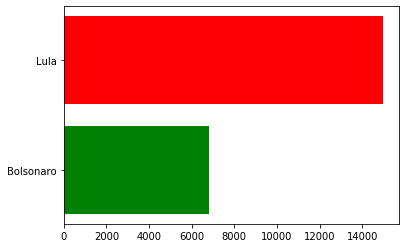

In [30]:
value1 = dataframe_tweets_bolsonaro.shape[0]
value2 = dataframe_tweets_lula.shape[0]

values = [value1, value2]
labels = ['Bolsonaro', 'Lula']
colors = ['green', 'red']

print('Total de Tweets de BOLSONARO: '+str(value1))
print('Total de Tweets de LULA: '+str(value2))

generate_graphic_bar(labels, values, colors)

<a id='section_3_1_2'></a>

### Primeiros Tweets

Primeiro Tweet de BOLSONARO:

In [31]:
data = get_first_tweet(dataframe_tweets_bolsonaro)
show_tweet(data)

01/04/2010
Boa noite a todos @depchicolanecar @reportercrime


Primeiro Tweet de LULA:

In [32]:
data = get_first_tweet(dataframe_tweets_lula)
show_tweet(data)

02/09/2014
Lula acaba de chegar ao @smabc de onde começará caminhada junto com @dilmabr #LulaeDilmanoABC


***

#### NOTAS

Analisando os dados acima, vimos que <b>Bolsonaro iniciou suas atividades em seu perfil no Twitter quatro anos antes de Lula.</b> Em seu primeiro twitter cita "Chico Alencar", político de oposição. 

Lula inicia suas atividades somente em setembro de 2014, época de campanha eleitoral para presidente, apoiando a então candidata Dilma Rouseff.

Conforme pode-se visualizar no gráfico do item 3.1.1, <b>o número de tweets de Lula é bem superior ao do perfil de Bolsonaro, mesmo tendo iniciado as atividades em seu perfil mais de quatro anos depois.</b>

<a id='section_3_1_3'></a>

### Tweets com o maior número de interações

Tweet com o maior número de interações de BOLSONARO:

In [33]:
data = get_top_action_tweet(dataframe_tweets_bolsonaro)
show_tweet(data)

29/10/2018
Recebemos há pouco ligação do Presidente dos EUA, @realDonaldTrump nos parabenizando por esta eleição histórica! Manifestamos o desejo de aproximar ainda mais estas duas grande nações e avançarmos no caminho da liberdade e da prosperidade!


Tweet com o maior número de interações de LULA:

In [34]:
data = get_top_action_tweet(dataframe_tweets_lula)
show_tweet(data)

08/11/2019
Lula Livre https://t.co/EJRrynjJjE


<hr>

#### NOTAS

No tweet com o maior número de interações de BOLSONARO, temos a informação de que o presidente dos Estados Unidos da América, Donald Trump, o parabeniza pelo resultado das eleições. <b>Isso pode estar refletindo em uma aprovação do dito alinhamento ideológico com o governo americano, propagado por Bolsonaro</b> (3).

No tweet com o maior número de interações de LULA, temos o mote <b>"Lula Livre", amplamente utilizado por simpatizantes como protesto por sua prisão, na data de sua libertação em 08/11/2019</b> (4).

<hr>

<a id='section_3_1_4'></a>

### Palavras mais utilizadas

Palavras mais utilizadas por BOLSONARO:

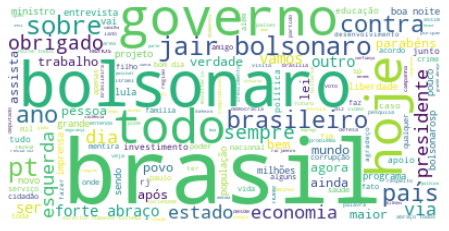

In [35]:
generate_text_cloud(build_cloud_words(dataframe_tweets_bolsonaro))

Palavras mais utilizadas por LULA:

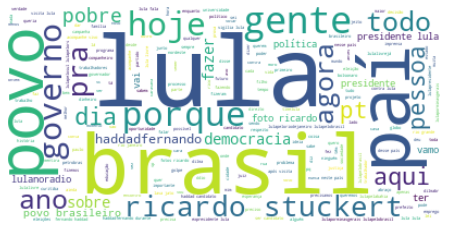

In [49]:
generate_text_cloud(build_cloud_words(dataframe_tweets_lula))

<hr>

#### NOTAS

Nota-se visualmente a predominância da palavras <b>"Brasil", "governo" e "hoje"</b>, além da citação do próprio nome (ou de alguém relacionado à família) nos textos dos tweets de ambas as personalidades. <b>Isso pode estar refletindo um desejo de afirmação de identidade na rede social associada ao país, Brasil</b>.

<hr>

<a id='section_3_1_5'></a>

### Palavras mais utilizadas nos Tweets com as 100 maiores interações (curtidas + retweets)

Palavras mais utilizadas por BOLSONARO nas 100 maiores interações:

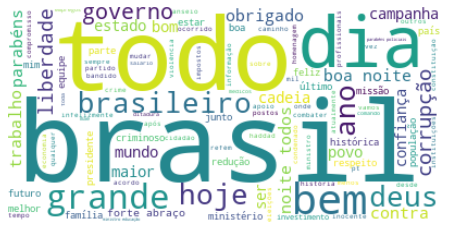

In [38]:
generate_text_cloud_top_actions_tweets(dataframe_tweets_bolsonaro, 100)

Palavras mais utilizadas por LULA nas 100 maiores interações:

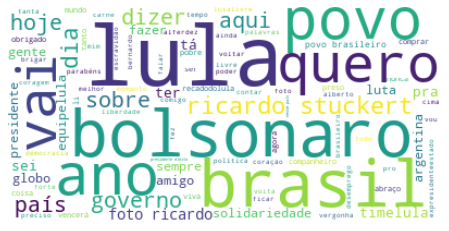

In [39]:
generate_text_cloud_top_actions_tweets(dataframe_tweets_lula, 100)

<hr>

#### NOTAS

Nos Tweets de maiores interações de BOLSONARO, nota-se visualmente palavras como "Brasil", "Grande" e "Dia" (que podem estar relacionados ao bordão "Grande Dia", utilizada por Bolsonaro para comemorar notícias negativas a oponentes, e <b>palavras como "Deus" e "corrupção", amplamente utilizadas em sua campanha</b> (5). 

Nos Tweets de maiores interações de LULA, nota-se visualmente a predominância da própria palavra "Lula" <b> e da palavra "Bolsonaro", o que pode estar refletindo no apoio de seus seguidores a textos contrapondo a ideias do oponente.</b>

<hr>

<a id='section_3_2'></a>

## Guerra Digital

<hr>

<a id='section_3_2_1'></a>

### Primeiros Tweets em que um citou o outro

Primeiro tweet em que Bolsonaro citou "Lula"

In [40]:
data = get_first_tweet_with_a_word(dataframe_tweets_bolsonaro, "lula")
show_tweet(data)

01/04/2010
#debate64 O PIB de Médici, Geisel e Costa e Silva foram mto maiores q os d Lula e FHC. Tentam desqualificar chamando  d Milagre este período


Primeiro tweet em que Lula citou "Bolsonaro"

In [41]:
data = get_first_tweet_with_a_word(dataframe_tweets_lula, "bolsonaro")
show_tweet(data)

06/09/2016
Lula: "toda vez que se nega a política, aparece um Bolsonaro, assim como, apareceu um Hitler e um Mussolini"


<hr>

#### NOTAS

Bolsonaro, em seu primeiro dia de atividade no perfil, já cita o nome do principal opositor. <b>Lula, por sua vez, somente cita "Bolsonaro" pela primeira vez quase 2 anos após o início de atividades em seu perfil e mais de seis anos após a primeira citação de Bolsonaro.</b>

<a id='section_3_2_2'></a>

### Número de Tweets em que um citou o outro

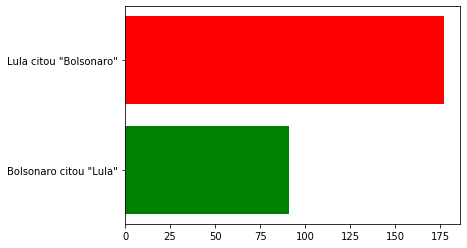

In [42]:
value1 = count_tweets_with_a_word(dataframe_tweets_bolsonaro, 'lula')
value2 = count_tweets_with_a_word(dataframe_tweets_lula, 'bolsonaro')

values = [value1, value2]
labels = ['Bolsonaro citou "Lula"', 'Lula citou "Bolsonaro"']
colors = ["green", "red"]

generate_graphic_bar(labels, values, colors)

<hr>

#### NOTAS

Apesar de Lula ter citado "Bolsonaro" pela primeira vez somente seis anos após ser citado no perfil opositor, <b>o número de citações a Bolsonaro por Lula é bem superior.</b> Desse dado pode-se deduzir um provável esforço da equipe do perfil de Lula para defender-se do avanço de Bolsonaro.

<a id='section_3_2_3'></a>

### Palavras mais utilizadas nos Tweets em que um citou o outro

Palavras mais utilizadas em que BOLSONARO citou "Lula":

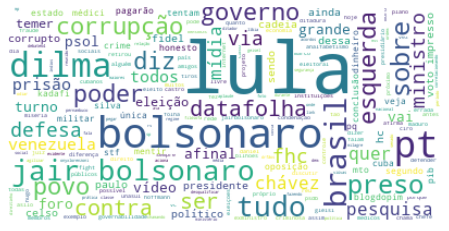

In [43]:
genenerate_text_cloud_words_tweets(dataframe_tweets_bolsonaro, 'lula')

Palavras mais utilizadas em que LULA citou "Bolsonaro":

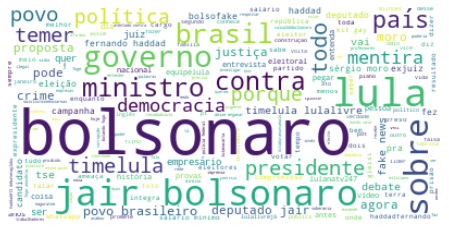

In [44]:
genenerate_text_cloud_words_tweets(dataframe_tweets_lula, 'bolsonaro')

<hr>

#### NOTAS

<b>No caso de Bolsonaro em citação à Lula, além da própria palavra "Lula", temos palavras como "Dilma", "PT", "esquerda", "corrupção", "Venezuela", "Chávez".</b> É de conhecimento público que essas foram palavras utilizadas em menções negativas ao principal partido oponente, ligando, por exemplo, Lula, Dilma e PT à regimes ditos esquerdistas e ditatoriais como a Venezuela (6).

<b>No caso de Lula em citação à Bolsonaro, além da própria palavra "Bolsonaro", temos palavras como "mentira", "democracia", "fake news", o que pode deduzir Tweets de defesa da equipe de Lula à menções negativas de Bolsonaro.</b> É relevante lembrar que "fake news" foi um termo bastante popularizado no Brasil na época das eleições (7).

<hr>

<a id='section_3_2_4'></a>

### Gráfico comparativo de citações

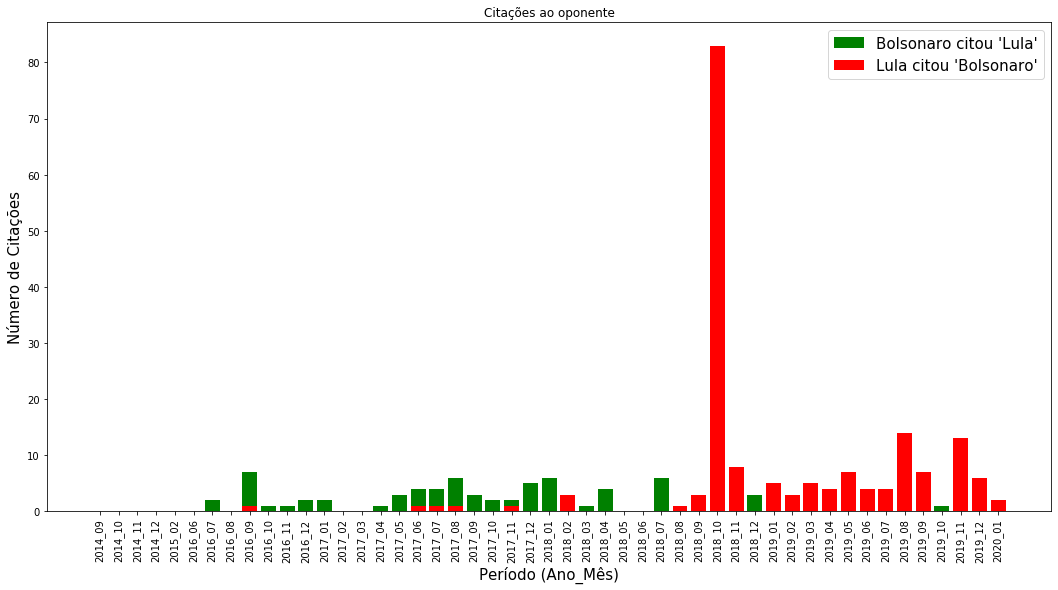

In [45]:
generate_graphic_with_opponent_word_count(dataframe_periods_bolsonaro, dataframe_periods_lula, "Bolsonaro citou 'Lula'", "Lula citou 'Bolsonaro'")

<hr>

#### NOTAS

Neste gráfico notamos, em agosto de 2018, uma <b> grande quantidade de citações de Bolsonaro por Lula. Neste mês a candidatura de Lula foi barrada pelo TSE, durante a campanha das eleições presidenciais</b> (8).

Nota-se também que <b>Lula só inicia, com maior recorrência, as citações a Bolsonaro em agosto de 2018. Pelo gráfico notam-se incidências de citações a Lula por Bolsonaro bem antes, em julho de 2016.</b>
    
Os gráficos consideram o período em comum de atividades de ambos os perfis.

<a id='section_3_3'></a>

## A Força das Redes

<hr>

<a id='section_3_3_1'></a>

### Gráfico Comparativo - Total de Tweets

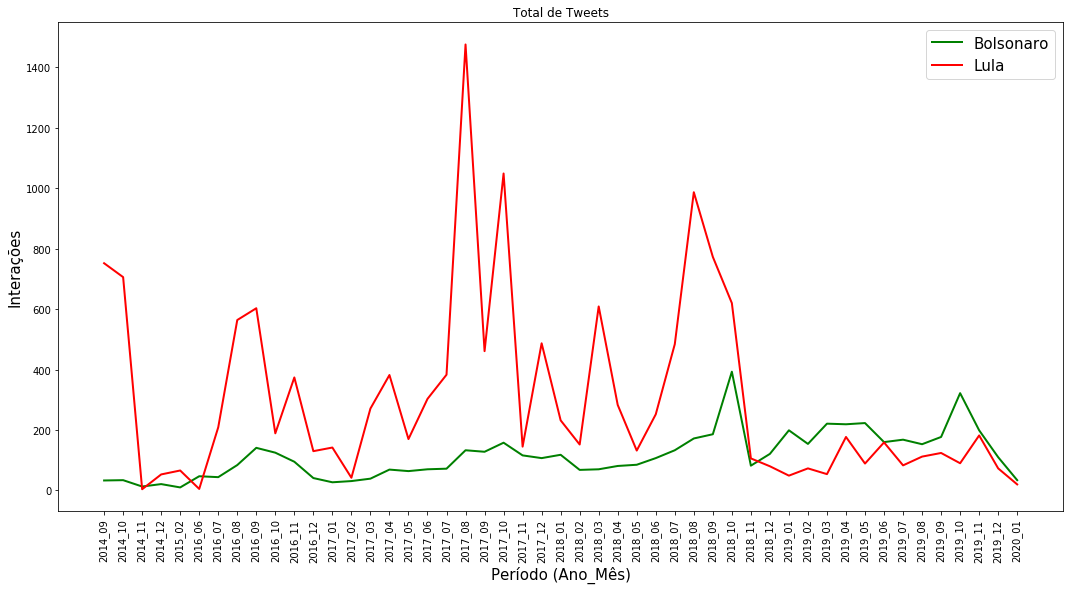

In [46]:
generate_graphic_with_total_tweets(dataframe_periods_bolsonaro, dataframe_periods_lula, 'Bolsonaro', 'Lula')

<a id='section_3_3_2'></a>

### Gráfico Comparativo - Interações (curtidas + retweets)

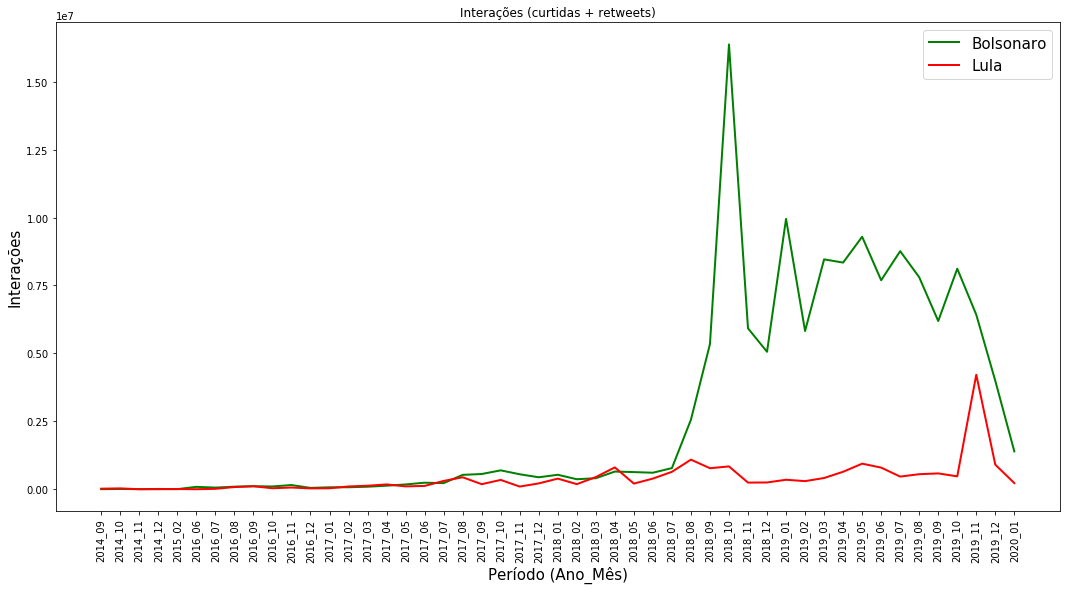

In [47]:
generate_graphic_with_actions(dataframe_periods_bolsonaro, dataframe_periods_lula, 'Bolsonaro', 'Lula')

<a id='section_3_3_3'></a>

### Gráfico Comparativo - Engajamento (interações / total de tweets)

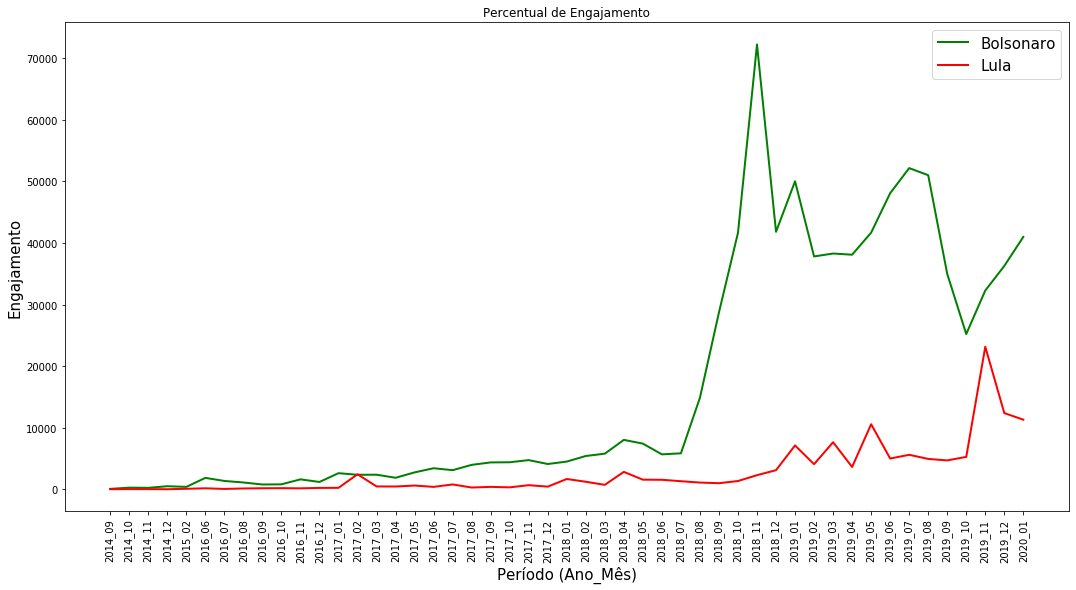

In [48]:
generate_graphic_with_engagement_count(dataframe_periods_bolsonaro, dataframe_periods_lula, 'Bolsonaro', 'Lula')

<hr>

#### NOTAS

Os gráficos acima referem-se ao período em comum de atividade dos dois perfis: setembro de 2014 a meados do mês de janeiro de 2020.

No primeiro gráfico é evidenciado um <b>maior número de tweets de Lula em relação a Bolsonaro</b>. Apesar do maior número de postagens, o segundo gráfico mostra que <b>a quantidade de interações (curtidas + retweets) de postagens de Bolsonaro é significamente maior que o de Lula</b>.

O último gráfico mostra ainda o "engajamento" dos seguidores em relação às postagens. Pode-se entender por engajamento o percentual entre as interações (curtidas + retweets) dividido pelo total de tweets do período. Essa métrica também pode ser entendida como a real efetividade das postagens.

Neste gráfico nota-se que <b>o engajamento em relação aos tweets de Bolsonaro é muito maior do que em relação a Lula evidenciando o enorme poderio digital do candidato nesta rede social</b> (9).

Em relação a picos de atividades, podemos visualizar no segundo gráfico, um maior número de interações a partir de maio/2017, mais de um ano antes das eleições de 2018. <b>No caso de Bolsonaro o pico foi atingido nos meses de agosto a outubro de 2018, época da campanha presidencial. Com Lula, o pico foi atingido em novembro de 2019, mês de sua libertação </b> (o Tweet com o maior número de interações, como foi mostrado anteriomente foi justamente na data de sua libertação).

<a id='section_4'></a>
<hr>

# CONSIDERAÇÕES FINAIS

A partir dos dados analisados por este trabalho, foi visto que Bolsonaro iniciou atividades na rede social Twitter bem antes do perfil oficial de Lula, em abril de 2010, e já em seu primeiro dia de postagem, realiza citações a Lula e a opositores.

Lula iniciou suas postagens em setembro de 2014, época da campanha presidencial, e somente realiza sua primeira citação a Bolsonaro dois anos depois.

Foi constatado também que apesar de Lula iniciar as citações a Bolsonaro somente em setembro de 2016, a quantidade de citações é mais de duas vezes maior do que as citações de Bolsonaro a Lula. Isso pode ser um reflexo de uma reação de "defesa" da equipe de administração de seu perfil.

Apesar dos prováveis esforços da equipe de Lula, tanto em relação às citações a Bolsonaro, como na quantidade totais de tweets (expressivamente superior a Bolsonaro), foi visto que as postagens de Bolsonaro possui um número muito maior de interações no Twitter, evidenciado a partir do gráfico comparativo de interações (curtidas + retweets).

Também foi constatado que os seguidores do perfil de Bolsonaro possuem um "engajamento" muito maior do que os seguidores de Lula. O gráfico de engajamento, que calcula a "eficiência" das postagens, dividindo o total de interações pelo total de tweets evidencia esse dado. A partir deste pode-se concluir que havia uma enorme disparidade no "poderio digital" das duas personalidades.

Tendo em vista a importância da utilização dos recursos digitais (principalmente redes sociais) nas eleições de 2018 (10), considerada uma campanha disruptiva (pois até então, o tempo de propaganda televisiva, era o principal balizador da opinião do eleitorado). Tendo em vista que o perfil oficial de Lula iniciou as atividades no Twitter mais de quatro anos após Bolsonaro, e tendo realizado a primeira citação ao opositor somente dois anos depois, terá sido esta uma das razões para o sucesso da construção da identidade do então candidato Jair Bolsonaro em contraponto a Lula e demais opositores?

***

**Fontes**


(1) Natural Language Processing with Python. - http://www.nltk.org/book/

(2) Generating WordClouds in Python. - https://www.datacamp.com/community/tutorials/wordcloud-python

(3) O alinhamento de Bolsonaro com Trump - https://diplomatique.org.br/o-alinhamento-de-bolsonaro-com-trump/

(4) Juiz determina saída de Lula da prisão após decisão do STF - https://g1.globo.com/pr/parana/noticia/2019/11/08/juiz-determina-saida-de-lula-da-prisao-apos-decisao-do-stf.ghtml

(5) Ideologia e Deus são as palavras mais citadas por Bolsonaro; veja 10 frases. - https://noticias.uol.com.br/politica/ultimas-noticias/2019/01/01/veja-frases-de-bolsonaro-nos-primeiros-discursos-como-presidente.htm?cmpid=copiaecola

(6) No rádio, Bolsonaro associa PT a Venezuela e Haddad critica violência - https://www1.folha.uol.com.br/poder/2018/10/no-radio-bolsonaro-associa-pt-a-venezuela-e-haddad-critica-violencia.shtml

(7) Fake News: o mal que as redes sociais disseminaram - https://www.professordeatualidades.com.br/fake-news-e-o-impacto-social

(8) TSE decide por 6 votos a 1 rejeitar a candidatura de Lula a presidente - https://g1.globo.com/politica/eleicoes/2018/noticia/2018/08/31/maioria-dos-ministros-do-tse-vota-pela-rejeicao-da-candidatura-de-lula.ghtml

(9) Bolsonaro aposta nas redes sociais para estruturar campanha - https://oglobo.globo.com/brasil/bolsonaro-aposta-nas-redes-sociais-para-estruturar-campanha-22592586

(10) "Eleição disruptiva" de Bolsonaro é tema de livro - https://politica.estadao.com.br/noticias/geral,eleicao-disruptiva-de-bolsonaro-e-tema-de-livro,70002906993